### computer vision libraries
* torchvision- base domain lib for pytorch
* torchvision.datasets
* torchvision.models
* torchvision.transforms
* torch.utils.data.dataset
* torch.utils.data.dataloader

In [10]:
import torch
from torch import nn
import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import  matplotlib.pyplot as plt

In [11]:
torch.__version__

'1.12.1'

In [12]:
torchvision.__version__

'0.13.1'

In [13]:
##getting a dataset

In [14]:
train_data= datasets.FashionMNIST(
    root="data", #where to download the data
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data= datasets.FashionMNIST(
    root="data", #where to download the data
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [15]:
len(train_data)
# len(test_data)

60000

In [16]:
#see the first training example

In [17]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [18]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [20]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [21]:
image.shape
#color channels, height , width

torch.Size([1, 28, 28])

In [22]:
#visualising our data

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'boot')

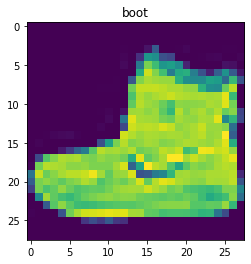

In [23]:
image,lable=train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title('boot')

(-0.5, 27.5, 27.5, -0.5)

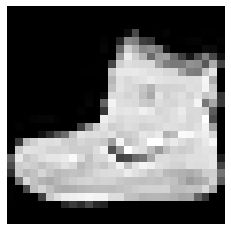

In [24]:
plt.imshow(image.squeeze(),cmap="gray")
plt.axis(False)

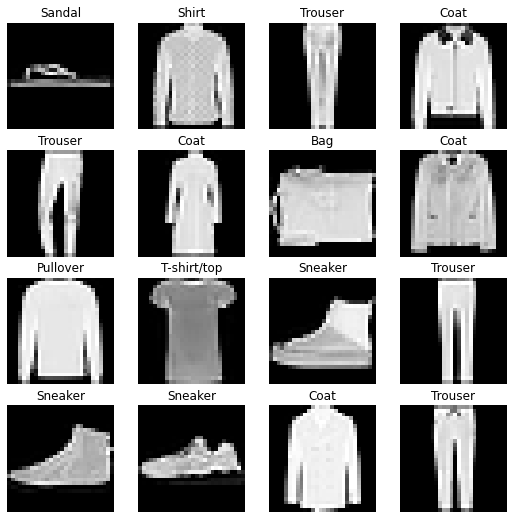

In [25]:
# torch.manual_seed(42)

fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1, rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,lable=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[lable])
    plt.axis(False)

In [26]:
#linear lines or non linearity

In [27]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [28]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [29]:
#dataloader turns our dataset into a python iterable
#we want to turn our data into batches (or mini-batches)
#as it is computationally efficient . So we break it down to 32 images at a time
#it gives our nn to upgrade its chances to update its epoch

In [30]:
from torch.utils.data import DataLoader #helps to create batches, very import library
BATCH_SIZE=32
#turn datasets into batches
train_dataloader=DataLoader(dataset=train_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [31]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [32]:
#whats happening in training datloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape
#batchsize, height,width,color channels


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

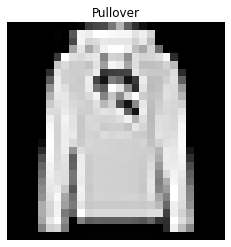

In [33]:
#show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch), size=[1]).item()
img,label= train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

#model_0
* when starting to build a series of ML mondeling experiments its best practice to start with a baseline model.
* a baseline mode l is a simple modelyou will try ans improve upon with subsequent models/experiments.
* in other words start simply and add complexity when necessary.

In [34]:
#creat a flatten layer
flatten_model=nn.Flatten()
#get a single sample
x= train_features_batch[0]
x.shape
#flatten the sample
output=flatten_model(x) #perform what happened
print('before flattening:')
print(x.shape)#color channels, height, width
print('after flattening:')
print(output.shape)#color channels, height*width

before flattening:
torch.Size([1, 28, 28])
after flattening:
torch.Size([1, 784])


In [35]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int, 
                 hidden_units:int, 
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
        )
    
    def forward(self,x):
        return self.layer_stack(x)   
    

In [36]:
torch.manual_seed(42)

model_0= FashionMNISTModelV0(input_shape=28*28,
                             hidden_units=10,
                             output_shape=len(class_names))

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [37]:
dum_x=torch.rand([1,1,28,28])
model_0(dum_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [38]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#### set up loss, optimizer and evaluation metrics
* loss fn- nn.CrossEntropyLoss()
* optimizer- torch.optim.SGD()
* Evaluation Metric- accuracy

In [39]:
import requests
from pathlib import Path
#download
if Path("helper_functions.py").is_file():
    print('exists, skipping download....')
else:
    print('downloading..')
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py','wb') as f:
        f.write(request.content)

exists, skipping download....


In [40]:
#import accuracy metric
from helper_functions import accuracy_fn
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

#creating a function to time our experiments
#Ml is experimental

We want to track:
1) Model's performance 
2) how fast it runs

In [41]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float):
    """Prints difference between start and end time """
    total_time= end-start
    return ("train time",total_time)

In [42]:
start_time= timer()
#some code
end_time= timer()
print_train_time(start=start_time, end=end_time)

('train time', 1.6042000027027825e-05)

# creating a training loop and create batches
* loop through epochs
* loop through training batches, perform training steps, calculate the train loss per batch
* loop through test batches, perform testing steps, calculate the test loss per batch
* print out whats happening
* time it

In [43]:
from tqdm.auto import tqdm

#seed seed and start the 
torch.manual_seed(42)
train_time_start= timer()
#no of epochs
epochs = 3 #30 secs or a min
# create traing and test loop
for epoch in tqdm(range(epochs)):
    #training
    train_loss = 0
    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        #1 forward pass
        y_pred= model_0(X)
        
        loss= loss_fn(y_pred,y)
        
        train_loss += loss #accumulate train loss
        
        optimizer.zero_grad()
        
        #loss backward
        loss.backward()
        
        #optimizer step
        optimizer.step()
        
        #print out whats happening
        if batch %400==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
            
    #divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    
    
    
    ###testing
    test_loss, test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #forward pass
            test_pred= model_0(X_test)
            
            #calculate the loss
            test_loss +=loss_fn(test_pred,y_test)
            
            #calculate the accuracy
            test_acc +=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        #calculate the test loss average per batch
        test_loss /= len(test_data)
        
        #calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    
    #print out whats happening
    print(f"\nTrain loss: {train_loss:4f} | Test_loss: {test_loss: 4f}, Test acc: {test_acc: 4f}")

#calculate the training time
train_time_end=timer()
total_train_time_model_0= print_train_time(start=train_time_start, end=train_time_end)
    
    
    
    
    
    
    
    
    
    

  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.590389 | Test_loss:  0.015948, Test acc:  82.038738
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.476332 | Test_loss:  0.015021, Test acc:  83.196885
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.455033 | Test_loss:  0.014919, Test acc:  83.426518


In [44]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True)

#### make predictions get model 0 results

In [45]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containng the results of model predicting on data Loader"""
    loss, acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            #make predictions
            y_pred= model(X)
            
            
            #accumulate the loss and accuracy balues per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred= y_pred.argmax(dim=1))
            
        #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc}
#calculate model 0. results  on test dataset
model_0_results = eval_model(model= model_0,
                            data_loader= test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn = accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# Model 1 non linear functions

we learned about non linearity before , helps us model non linear data


In [53]:
#create a mode with non linear and linear models

In [58]:
class FashionMNISTV1(nn.Module):
    def __init__(self,
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                     out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units,
                     out_features= output_shape),
            nn.ReLU()
            
            )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [60]:
model_1= FashionMNISTV1(input_shape= 784,
                       hidden_units=10,
                       output_shape=len(class_names))

In [61]:
model_1.parameters

<bound method Module.parameters of FashionMNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)>

In [62]:
torch.manual_seed(42)

In [64]:
#set up loss functions, optimizer and metrics
from helper_functions import accuracy_fn
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1) #updates parameters to reduce the loss

functionizing training and evaluation/ testing loops 

1) training loop- train_step()


 2) testing loop- testing_step()

In [71]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
    train_loss, train_acc = 0,0
    #put model in training mode
    model.train()

    #training

    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
        #1 forward pass
        y_pred= model(X)
        
        loss= loss_fn(y_pred,y)
        
        train_loss += loss #accumulate train loss
        train_acc +=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        #loss backward
        loss.backward()
        
        #optimizer step
        optimizer.step()
        
        #print out whats happening
        if batch %400==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
            
    #divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    #print out whats happening
    print(f"Train loss: {train_loss:0.5f} | Train_acc: {train_acc: 0.2f}%")


def testing_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            #forward pass
            test_pred= model(X)
            
            #calculate the loss
            test_loss +=loss_fn(test_pred,y)
            
            #calculate the accuracy
            test_acc +=accuracy_fn(y_true=y, 
                                   y_pred=test_pred.argmax(dim=1))
            
        #calculate the test loss average per batch
        test_loss /= len(data_loader)
        
        #calculate the test acc average per batch
        test_acc /= len(data_loader)
    
    #print out whats happening
    print(f"Test_loss: {train_loss:0.5f} | Test_acc: {test_loss: 0.2f}, Test acc: {test_acc: 4f}")

    

## main test/train loop using functions we made

In [76]:

# create traing and test loop
from timeit import default_timer as timer
train_time_start= timer()
epochs = 3 #30 secs or a min
# create traing and test loop

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn= loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    testing_step(model=model_1,
                 data_loader=test_dataloader,
                 loss_fn= loss_fn,
                 accuracy_fn=accuracy_fn)

train_time_end= timer()
total_train_time_model_1= print_train_time(start=train_time_start,
                                          end=train_time_end)
print(total_train_time_model_1, 'seconds')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.57496 | Train_acc:  78.60%
Test_loss: 0.45503 | Test_acc:  0.65, Test acc:  75.459265
Epoch: 1
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.40500 | Train_acc:  85.74%
Test_loss: 0.45503 | Test_acc:  0.43, Test acc:  85.203674
Epoch: 2
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.37525 | Train_acc:  86.76%
Test_loss: 0.45503 | Test_acc:  0.44, Test acc:  84.295128
('train time', 12.242029625000214) seconds


In [77]:
model_1_results= eval_model(model= model_1,
                           data_loader= test_dataloader,
                           loss_fn= loss_fn,
                           accuracy_fn= accuracy_fn)

In [78]:
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.438970685005188,
 'model_acc': 84.29512779552715}

In [79]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}